In [1]:
HEAD_PATH = "/home/hunk/workspaces/demo/studyQuantitativeTrading/intern"

In [2]:
import warnings
 
warnings.filterwarnings('ignore')

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [3]:
DATA_PATH = HEAD_PATH + "/stock pkl/"

- set working directory

In [4]:
import os
os.chdir(DATA_PATH)

- number of cores

In [5]:
#CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
#CORE_NUM
#兼容
def ncpus():
    #for Linux, Unix and MacOS
    if hasattr(os, "sysconf"):
        if "SC_NPROCESSORS_ONLN" in os.sysconf_names:
            #Linux and Unix
            ncpus = os.sysconf("SC_NPROCESSORS_ONLN")
            if isinstance(ncpus, int) and ncpus > 0:
                return ncpus
        else:
            #MacOS X
            return int(os.popen2("sysctl -n hw.ncpu")[1].read())
    #for Windows
    if "NUMBER_OF_PROCESSORS" in os.environ:
        ncpus = int(os.environ["NUMBER_OF_PROCESSORS"])
        if ncpus > 0:
            return ncpus
    #return the default value
    return 1
CORE_NUM = ncpus()
CORE_NUM

4


- get working directory

In [6]:
os.getcwd()

'/home/hunk/workspaces/demo/studyQuantitativeTrading/intern/stock pkl'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [7]:
product_list = ["600276","000538",  "600332", "600436", "600535"]
product = product_list[1]

- directory of the product's data

In [8]:
dire = DATA_PATH + product
dire

'/home/hunk/workspaces/demo/studyQuantitativeTrading/intern/stock pkl/000538'

- get all available data

In [9]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 5

6

In [10]:
date = "2018"

In [11]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

In [12]:
data["date.time"]

0         2018-01-02 09:25:03
1         2018-01-02 09:30:03
2         2018-01-02 09:30:06
3         2018-01-02 09:30:09
4         2018-01-02 09:30:12
                 ...         
644584    2018-12-28 14:56:45
644585    2018-12-28 14:56:51
644586    2018-12-28 14:56:54
644587    2018-12-28 14:56:57
644588    2018-12-28 15:00:03
Name: date.time, Length: 644589, dtype: object

In [13]:
import numpy as np
aa= np.array([x[0:10] for x in data["date.time"]])

In [14]:
aa = np.append(aa,'1')

In [15]:
aa

array(['2018-01-02', '2018-01-02', '2018-01-02', ..., '2018-12-28',
       '2018-12-28', '1'], dtype='<U10')

In [16]:
#np.array(aa).shift(-1)
np.roll(aa,-1)

array(['2018-01-02', '2018-01-02', '2018-01-02', ..., '2018-12-28', '1',
       '2018-01-02'], dtype='<U10')

- we can see that there are 974 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

- specify a date

- loading data set

- get the column names of data

In [19]:
data["wpr"] = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])


In [20]:
data

,date.time,price,traded.num,turnover,qty,bid1,bid2,bid3,bid4,bid5,...,ask2.qty,ask3.qty,ask4.qty,ask5.qty,adjust,wpr,next.bid,next.ask,wpr.ret,ret
0,2018-01-02 09:25:03,102.41,29,686147.0,67,102.41,102.21,102.11,102.08,102.03,...,21,2,1,10,0.942227,102.440000,102.58,102.60,0.000000,0.000000
1,2018-01-02 09:30:03,102.60,34,1455628.0,142,102.58,102.48,102.47,102.44,102.41,...,2,49,4,1,0.942227,102.599524,102.60,102.65,0.150308,0.001556
2,2018-01-02 09:30:06,102.60,2,20520.0,2,102.60,102.58,102.48,102.47,102.44,...,49,4,1,6,0.942227,102.646774,102.60,102.75,0.044521,0.000460
3,2018-01-02 09:30:09,102.60,7,164320.0,16,102.60,102.58,102.48,102.47,102.44,...,4,1,6,3,0.942227,102.660000,102.65,102.75,0.012462,0.000129
4,2018-01-02 09:30:12,102.75,2,71925.0,7,102.65,102.60,102.58,102.48,102.47,...,4,1,6,3,0.942227,102.704386,102.65,102.75,0.041822,0.000432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644584,2018-12-28 14:56:45,74.08,5,59264.0,8,74.05,74.01,74.00,73.96,73.95,...,1,21,8,17,0.942227,74.055294,74.05,74.06,-0.005376,-0.000077
644585,2018-12-28 14:56:51,74.05,1,7392.0,1,74.05,74.01,74.00,73.96,73.95,...,14,1,21,8,0.942227,74.052857,73.96,74.00,-0.002296,-0.000033
644586,2018-12-28 14:56:54,74.00,12,214624.0,29,73.96,73.95,73.94,73.91,73.90,...,6,14,1,15,0.942227,73.970000,73.95,74.00,-0.078070,-0.001120
644587,2018-12-28 14:56:57,73.95,2,14800.0,2,73.95,73.94,73.91,73.90,73.89,...,6,14,1,15,0.942227,73.978571,73.96,73.97,0.008076,0.000116


In [21]:
data.columns

Index(['date.time', 'price', 'traded.num', 'turnover', 'qty', 'bid1', 'bid2',
       'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1.qty', 'bid2.qty', 'bid3.qty', 'bid4.qty', 'bid5.qty', 'ask1.qty',
       'ask2.qty', 'ask3.qty', 'ask4.qty', 'ask5.qty', 'adjust', 'wpr',
       'next.bid', 'next.ask', 'wpr.ret', 'ret'],
      dtype='object')

In [22]:

outlier = (data["bid1"]<1e-6) | (data["ask1"]<1e-6) | (np.isnan(data["wpr"]))

In [24]:
outlier

0         False
1         False
2         False
3         False
4         False
          ...  
644584    False
644585    False
644586    False
644587    False
644588    False
Length: 644589, dtype: bool

In [36]:
data["price"]

0         102.41
1         102.60
2         102.60
3         102.60
4         102.75
           ...  
644584     74.08
644585     74.05
644586     74.00
644587     73.95
644588     73.96
Name: price, Length: 644589, dtype: float64

In [37]:
data["price"][outlier]

3406      102.49
3407      102.49
30828     102.35
75120      99.75
94038      92.10
99231      93.99
101728     95.91
102540     96.20
103090     95.88
109077     95.60
109229     95.66
109307     95.40
109496     95.59
109736     95.50
109739     95.50
109752     95.48
109990     95.64
159897    100.70
202531     94.90
203425     93.17
205599     93.57
238710    109.00
241323    108.90
242031    108.54
281774    116.30
284898    115.86
303416    113.20
321494    108.07
322590    107.29
343607    105.88
348647    105.39
348652    105.40
402826    105.04
527127     73.21
527245     73.40
528087     72.96
572713     73.70
Name: price, dtype: float64

In [33]:

data["wpr"][outlier]

3406      0.0
3407      0.0
30828     NaN
75120     NaN
94038     NaN
99231     0.0
101728    NaN
102540    NaN
103090    NaN
109077    NaN
109229    NaN
109307    NaN
109496    NaN
109736    NaN
109739    NaN
109752    NaN
109990    NaN
159897    NaN
202531    0.0
203425    NaN
205599    NaN
238710    0.0
241323    NaN
242031    NaN
281774    NaN
284898    NaN
303416    0.0
321494    NaN
322590    NaN
343607    0.0
348647    NaN
348652    NaN
402826    NaN
527127    NaN
527245    NaN
528087    NaN
572713    NaN
Name: wpr, dtype: float64

In [34]:

data["wpr"][outlier] = data["price"][outlier]

In [35]:
data["wpr"][outlier]

3406      102.49
3407      102.49
30828     102.35
75120      99.75
94038      92.10
99231      93.99
101728     95.91
102540     96.20
103090     95.88
109077     95.60
109229     95.66
109307     95.40
109496     95.59
109736     95.50
109739     95.50
109752     95.48
109990     95.64
159897    100.70
202531     94.90
203425     93.17
205599     93.57
238710    109.00
241323    108.90
242031    108.54
281774    116.30
284898    115.86
303416    113.20
321494    108.07
322590    107.29
343607    105.88
348647    105.39
348652    105.40
402826    105.04
527127     73.21
527245     73.40
528087     72.96
572713     73.70
Name: wpr, dtype: float64

In [ ]:

data["price"]["bid1"]
#Index(['date.time', 'price', 'traded.num', 'turnover', 'qty', 'bid1', 'bid2',
#       'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
#       'bid1.qty', 'bid2.qty', 'bid3.qty', 'bid4.qty', 'bid5.qty', 'ask1.qty',
#       'ask2.qty', 'ask3.qty', 'ask4.qty', 'ask5.qty', 'adjust'],
#      dtype='object')
'''
3406      102.49
3407      102.49
30828     102.35
75120      99.75
94038      92.10
99231      93.99
101728     95.91
102540     96.20
103090     95.88
109077     95.60
109229     95.66
109307     95.40
109496     95.59
109736     95.50
'''

In [50]:
data.iloc[0:10,0:10]

#date.time 	price 	traded.num 	turnover 	qty 	bid1 	bid2 	bid3 	bid4 	bid5
#0 	2018-01-02 09:25:01 	69.42 	66 	1665802.0 	240 	69.42 	69.40 	69.35 	69.28 	69.20
#1 	2018-01-02 09:30:00 	69.47 	7 	409861.0 	59 	69.47 	69.42 	69.40 	69.35 	69.28
#2 	2018-01-02 09:30:02 	69.42 	48 	1838507.0 	265 	69.42 	69.40 	69.35 	69.28 	69.20
#3 	2018-01-02 09:30:06 	69.48 	36 	993680.0 	143 	69.48 	69.47 	69.46 	69.44 	69.42
#4 	2018-01-02 09:30:12 	69.66 	4 	55720.0 	8 	69.65 	69.48 	69.47 	69.46 	69.44
#5 	2018-01-02 09:30:15 	69.67 	8 	132349.0 	19 	69.65 	69.60 	69.55 	69.48 	69.47
#6 	2018-01-02 09:30:18 	69.50 	8 	167107.0 	24 	69.55 	69.50 	69.48 	69.47 	69.46
#7 	2018-01-02 09:30:24 	69.67 	2 	13923.0 	2 	69.67 	69.60 	69.55 	69.50 	69.48
#8 	2018-01-02 09:30:27 	69.68 	4 	69659.0 	10 	69.67 	69.66 	69.60 	69.55 	69.50
#9 	2018-01-02 09:30:30 	69.67 	4 	132374.0 	19 	69.66 	69.60 	69.55 	69.50 	69.48

,date.time,price,traded.num,turnover,qty,bid1,bid2,bid3,bid4,bid5
0,2018-01-02 09:25:03,102.41,29,686147.0,67,102.41,102.21,102.11,102.08,102.03
1,2018-01-02 09:30:03,102.60,34,1455628.0,142,102.58,102.48,102.47,102.44,102.41
2,2018-01-02 09:30:06,102.60,2,20520.0,2,102.60,102.58,102.48,102.47,102.44
3,2018-01-02 09:30:09,102.60,7,164320.0,16,102.60,102.58,102.48,102.47,102.44
4,2018-01-02 09:30:12,102.75,2,71925.0,7,102.65,102.60,102.58,102.48,102.47
5,2018-01-02 09:30:15,102.75,1,20550.0,2,102.65,102.60,102.58,102.48,102.47
6,2018-01-02 09:30:18,102.74,1,10274.0,1,102.65,102.60,102.58,102.50,102.48
7,2018-01-02 09:30:21,102.74,2,92466.0,9,102.66,102.65,102.58,102.50,102.48
8,2018-01-02 09:30:24,102.74,5,143848.0,14,102.74,102.66,102.65,102.58,102.50
9,2018-01-02 09:30:27,102.75,10,606120.0,59,102.65,102.58,102.50,102.48,102.47


In [51]:
data.iloc[0:10,10:20]

#ask1 	ask2 	ask3 	ask4 	ask5 	bid1.qty 	bid2.qty 	bid3.qty 	bid4.qty 	bid5.qty
#0 	69.44 	69.45 	69.46 	69.47 	69.48 	157 	36 	2 	3 	1
#1 	69.48 	69.49 	69.50 	69.58 	69.59 	25 	157 	36 	2 	3
#2 	69.59 	69.60 	69.65 	69.66 	69.67 	142 	36 	2 	8 	1
#3 	69.60 	69.65 	69.66 	69.67 	69.68 	3 	6 	4 	15 	114
#4 	69.66 	69.67 	69.68 	69.69 	69.70 	15 	63 	6 	4 	15
#5 	69.67 	69.68 	69.69 	69.70 	69.78 	8 	1 	1 	8 	6
#6 	69.67 	69.68 	69.69 	69.70 	69.78 	5 	2 	8 	6 	4
#7 	69.68 	69.69 	69.70 	69.78 	69.79 	2 	3 	68 	4 	8
#8 	69.68 	69.69 	69.70 	69.78 	69.79 	12 	10 	5 	68 	4
#9 	69.67 	69.68 	69.69 	69.70 	69.78 	10 	5 	7 	4 	8

# data.iloc[0:10,20:]

,ask1,ask2,ask3,ask4,ask5,bid1.qty,bid2.qty,bid3.qty,bid4.qty,bid5.qty
0,102.47,102.48,102.49,102.50,102.58,1,172,2,1,30
1,102.60,102.65,102.75,102.79,102.83,41,14,31,1,22
2,102.65,102.75,102.79,102.83,102.85,29,41,25,58,2
3,102.75,102.79,102.83,102.85,102.89,26,41,25,59,2
4,102.75,102.79,102.83,102.85,102.89,62,25,41,27,58
5,102.75,102.79,102.83,102.85,102.89,62,25,41,27,50
6,102.74,102.75,102.79,102.83,102.85,84,25,41,15,27
7,102.75,102.79,102.83,102.85,102.89,1,84,41,18,29
8,102.75,102.79,102.83,102.85,102.89,50,5,22,41,18
9,102.75,102.79,102.83,102.85,102.89,21,41,18,28,31


In [52]:
data.iloc[0:10,20:]

# 	ask1.qty 	ask2.qty 	ask3.qty 	ask4.qty 	ask5.qty 	adjust
#0 	3 	1 	1 	54 	3 	0.993027
#1 	3 	96 	1 	3 	30 	0.993027
#2 	31 	13 	1 	15 	3 	0.993027
#3 	1 	1 	15 	3 	5 	0.993027
#4 	10 	3 	5 	35 	11 	0.993027
#5 	1 	5 	35 	11 	8 	0.993027
#6 	1 	5 	34 	11 	8 	0.993027
#7 	5 	34 	11 	8 	80 	0.993027
#8 	3 	34 	11 	8 	80 	0.993027
#9 	25 	3 	34 	11 	8 	0.993027

,ask1.qty,ask2.qty,ask3.qty,ask4.qty,ask5.qty,adjust,wpr,next.bid,next.ask,wpr.ret,ret
0,1,21,2,1,10,0.942227,102.440000,102.58,102.60,0.000000,0.000000
1,1,2,49,4,1,0.942227,102.599524,102.60,102.65,0.150308,0.001556
2,2,49,4,1,6,0.942227,102.646774,102.60,102.75,0.044521,0.000460
3,39,4,1,6,3,0.942227,102.660000,102.65,102.75,0.012462,0.000129
4,52,4,1,6,3,0.942227,102.704386,102.65,102.75,0.041822,0.000432
5,50,4,1,6,3,0.942227,102.705357,102.65,102.74,0.000915,0.000009
6,9,50,4,1,6,0.942227,102.731290,102.66,102.75,0.024435,0.000252
7,50,4,1,6,3,0.942227,102.661765,102.74,102.75,-0.065509,-0.000677
8,38,4,6,6,3,0.942227,102.745682,102.65,102.75,0.079069,0.000817
9,35,4,6,6,3,0.942227,102.687500,102.75,102.79,-0.054820,-0.000566


- plot the price

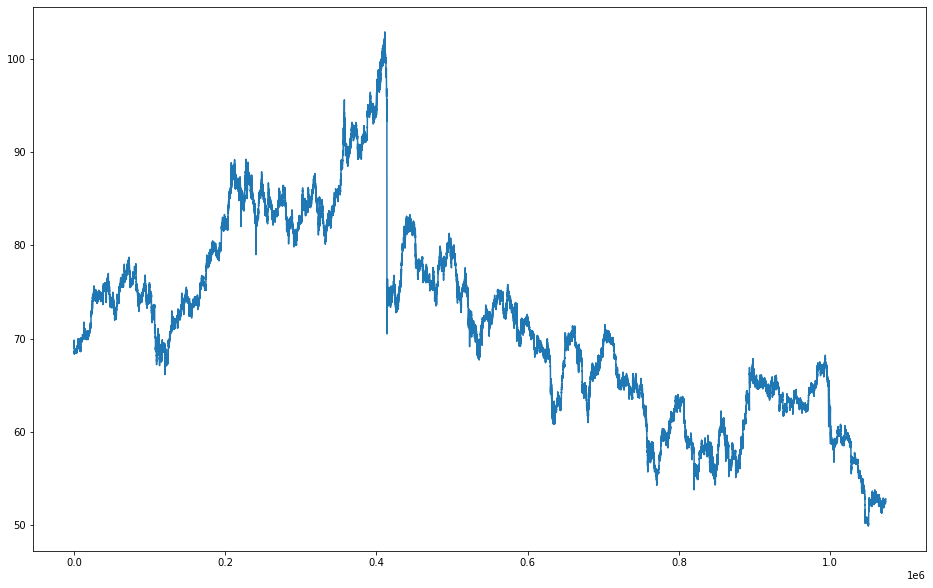

In [41]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

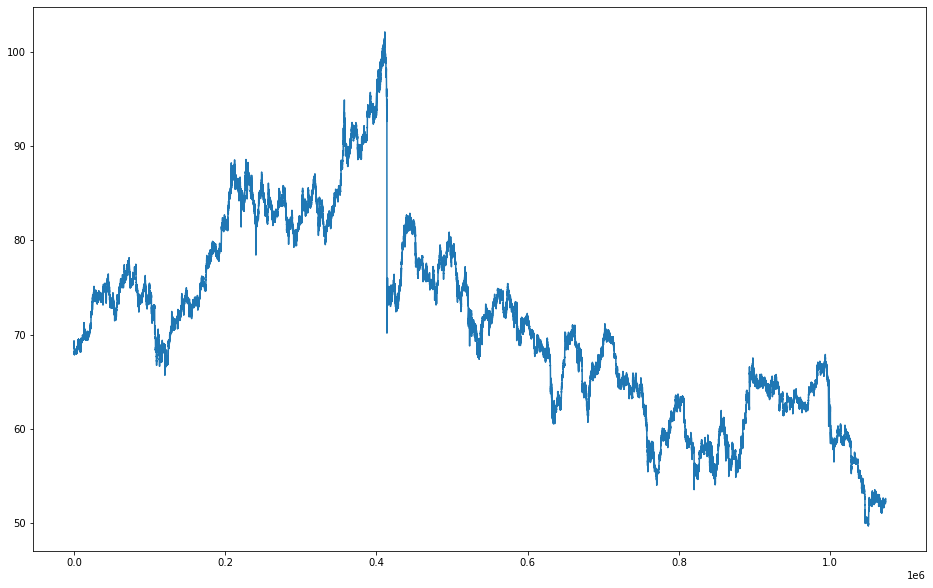

In [42]:
plt.figure(1, figsize=(16, 10))
plt.plot(data["price"]*data["adjust"]);

In [43]:
data["date.time"]

0          2018-01-02 09:25:01
1          2018-01-02 09:30:00
2          2018-01-02 09:30:02
3          2018-01-02 09:30:06
4          2018-01-02 09:30:12
                  ...         
1073071    2018-12-28 14:56:48
1073072    2018-12-28 14:56:51
1073073    2018-12-28 14:56:54
1073074    2018-12-28 14:56:57
1073075    2018-12-28 15:00:00
Name: date.time, Length: 1073076, dtype: object

- plot price change

In [44]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

In [46]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [47]:
def save(data, path):
    serialized = cPickle.dumps(data)
    with gzip.open(path, 'wb', compresslevel=1) as file_object:
        file_object.write(serialized)

In [48]:
data["bid1"]

0          69.42
1          69.47
2          69.42
3          69.48
4          69.65
           ...  
1073071    52.73
1073072    52.71
1073073    52.71
1073074    52.73
1073075    52.74
Name: bid1, Length: 1073076, dtype: float64

In [49]:
data["bid1"].shift(-1)

0          69.47
1          69.42
2          69.48
3          69.65
4          69.65
           ...  
1073071    52.71
1073072    52.71
1073073    52.73
1073074    52.74
1073075      NaN
Name: bid1, Length: 1073076, dtype: float64

In [50]:
def addWpr(date, product):
    data = load(DATA_PATH+"/"+product+"/"+date)
    data["wpr"] = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])
    outlier = (data["bid1"]<1e-6) | (data["ask1"]<1e-6) | (np.isnan(data["wpr"]))
    data["wpr"][outlier] = data["price"][outlier]
    data["next.bid"] = data["bid1"].shift(-1)
    data["next.ask"] = data["ask1"].shift(-1)
    data["wpr"] = data["wpr"]*data["adjust"]
    data["wpr.ret"] = data["wpr"]-data["wpr"].shift(1)
    data["wpr.ret"][0] = 0
    data["ret"] = np.log(data["wpr"]) - np.log(data["wpr"]).shift(1)
    data["ret"][0] = 0
    save(data, DATA_PATH+"/"+product+"/"+date)

In [55]:
%%time
for product in product_list:
    result = parLapply(CORE_NUM, all_dates, addWpr, product=product)


## Wall time: 51.6 s


CPU times: user 183 ms, sys: 150 ms, total: 333 ms
Wall time: 1min 3s


In [56]:
product = product_list[0]
data = load(DATA_PATH+"/"+product+"/"+"2018.pkl")

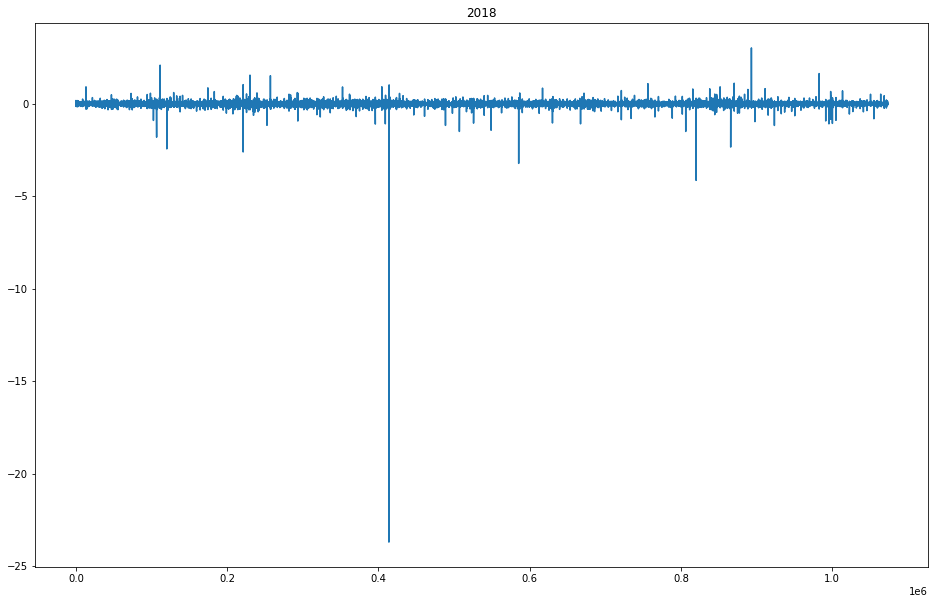

In [57]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

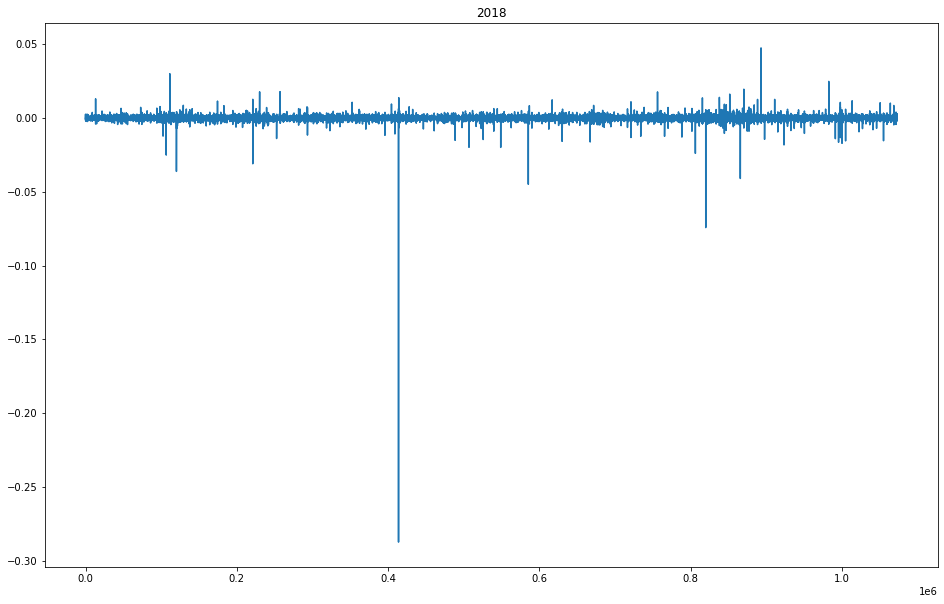

In [58]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [59]:
sum(data['ret']>0)/len(data)
## 0.4929688111559666

0.4929790620608419

- count the number of falling ticks

In [60]:
sum(data['ret']<0)/len(data)
## 0.4989758414129102

0.4989879561186719

In [61]:
sum(data['ret']==0)/len(data)
## 0.008029254218713306

0.008032981820486155

- count the number of total ticks

In [62]:
len(data)
## 1073076

1073076

- formula to calculate wpr:

In [63]:
wpr = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])

- upper limit or lower limit

In [64]:
limit = (data["ask1"]<1e-6) | (data["bid1"]<1e-6)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [65]:
wpr[limit] = data["price"][limit]

In [66]:
wpr = wpr*data["adjust"]

In [67]:
wpr.head()

#0    101.313748
#1    101.371093
#2    101.488703
#3    101.503968
#4    101.629443
#dtype: float64



0    68.955392
1    68.994422
2    69.074469
3    69.084858
4    69.170258
dtype: float64

In [68]:
data["wpr"].head()


#0    101.313748
#1    101.371093
#2    101.488703
#3    101.503968
#4    101.629443
#Name: wpr, dtype: float64


0    68.955392
1    68.994422
2    69.074469
3    69.084858
4    69.170258
Name: wpr, dtype: float64

In [69]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [70]:
import statsmodels.tsa.stattools as ts

In [71]:
result = ts.adfuller(data["ret"], maxlag=int(pow(len(data["ret"])-1,(1/3))), regression='ct', autolag=None)
result

#(-102.45762905660685,
# 0.0,
# 102,
# 1072973,
# {'1%': -3.958778437422465,
#  '5%': -3.4104940918163096,
#  '10%': -3.127052409756497})

## for this test the smaller the value the more stationary it is
## so it's stationary

(-104.5218405052191,
 0.0,
 102,
 1072973,
 {'1%': -3.958778437422465,
  '5%': -3.4104940918163096,
  '10%': -3.127052409756497})

In [72]:
result = ts.kpss(data["ret"], regression='c', lags=int(3*math.sqrt(len(data["ret"]))))
result
                 
#(0.28987911092066426,
# 0.1,
# 3107,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})                                                    
                                                                   
                                                                    

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

/Users/hunkguo/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.14539353378938544,
 0.1,
 3107,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [73]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [74]:
sum(data["ret"][0:120])
## 0.003527416579581555

0.003527416579582443

In [75]:
ret_120.iloc[0]
## 0.003527416579581555

0.003527416579582443

- plot the price movements of 120 ticks

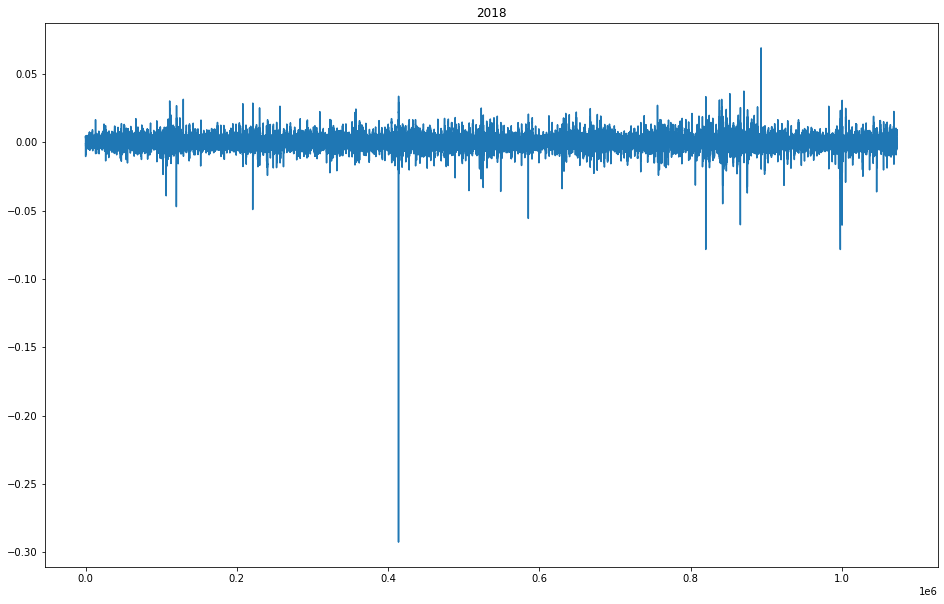

In [76]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [77]:
len(ret_120)
## 1072957

1072957

In [78]:
len(data)
## 1073076

1073076

In [79]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0))[119:]

In [80]:
len(ret_120)
## 1072957

1072957

In [81]:
ret_120.iloc[np.where(range_120)]

#1          0.003599
#121       -0.006373
#241        0.000296
#361       -0.007063
#481       -0.004508
#             ...   
#1072441   -0.001553
#1072561    0.001630
#1072681   -0.000886
#1072801   -0.001472
#1072921    0.004821
#Name: ret, Length: 8942, dtype: float64

1          0.003599
121       -0.006373
241        0.000296
361       -0.007063
481       -0.004508
             ...   
1072441   -0.001553
1072561    0.001630
1072681   -0.000886
1072801   -0.001472
1072921    0.004821
Name: ret, Length: 8942, dtype: float64

- test whether ret.120 is stationary

In [82]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

#(-19.565107458213205,
# 0.0,
# 20,
# 8921,
# {'1%': -3.9597851651523333,
#  '5%': -3.4109822557405076,
#  '10%': -3.1273398823286973})

(-19.28676303538883,
 0.0,
 20,
 8921,
 {'1%': -3.9597851651523333,
  '5%': -3.4109822557405076,
  '10%': -3.1273398823286973})

In [83]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

#(0.2945675341590547,
# 0.1,
# 21,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

/Users/hunkguo/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.14828329212577354,
 0.1,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [84]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

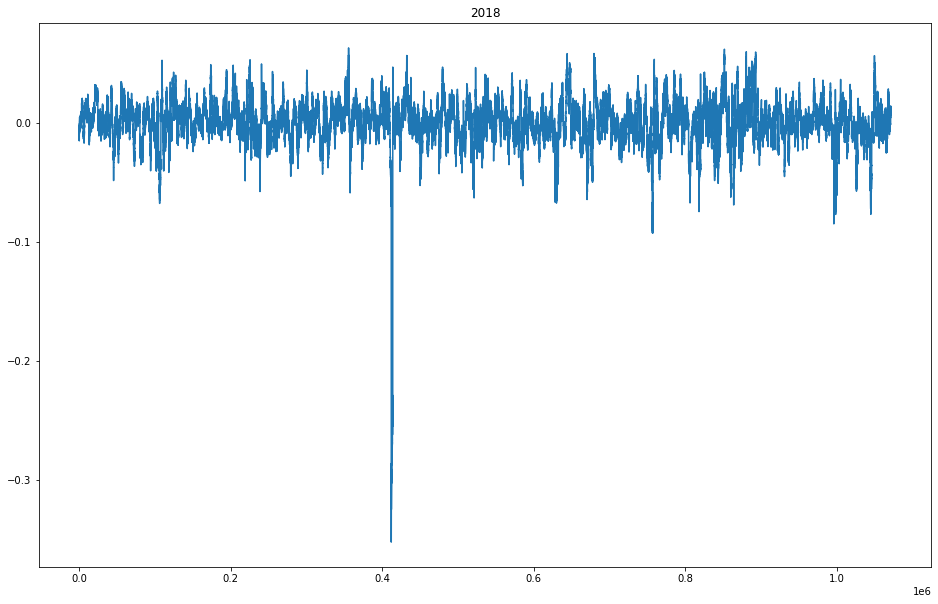

In [85]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [86]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0))
## 536

536

- So there are too few points to test for stationary

In [87]:
import pandas as pd
import _pickle as cPickle
import gzip

- there may be too few data
- we can check for more days

In [88]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0))[(period-1):]
    return ret.iloc[np.where(range)]


In [89]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 5.66 s

CPU times: user 36 ms, sys: 42.6 ms, total: 78.6 ms
Wall time: 5.09 s


''

In [90]:
from itertools import chain 

In [91]:
ret_long = list(chain.from_iterable(result)) 

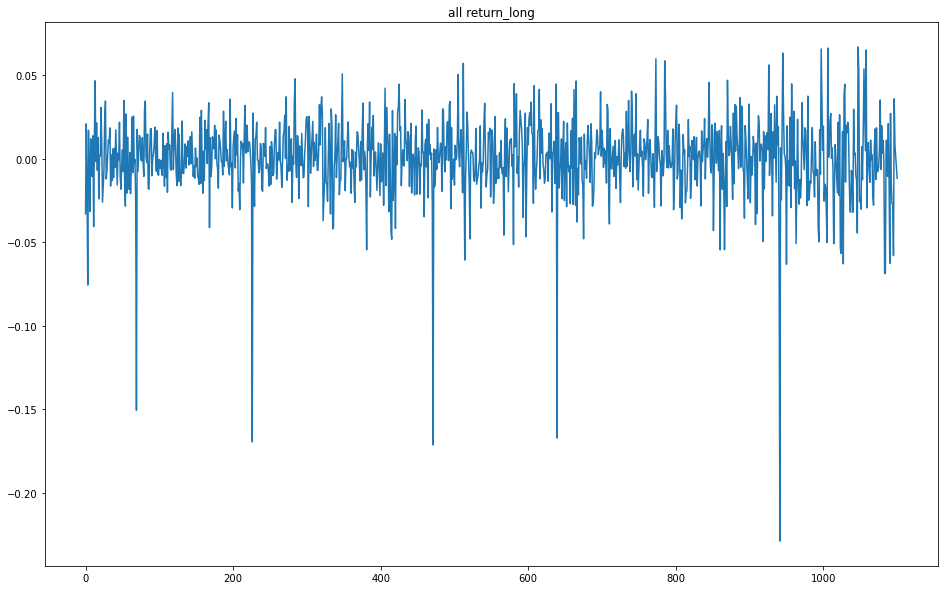

In [92]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [93]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

#(-10.7196397758502,
# 7.761245360247944e-17,
# 10,
# 1090,
# {'1%': -3.9670996272013985,
#  '5%': -3.414525530365729,
#  '10%': -3.129425430967183})

## it's still stationary

(-10.8014401554166,
 5.366409116477528e-17,
 10,
 1090,
 {'1%': -3.9670996272013985,
  '5%': -3.414525530365729,
  '10%': -3.129425430967183})

In [94]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

#(0.10582252718299393,
# 0.1,
# 7,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ## p-value is 0.1 so it's stationary

/Users/hunkguo/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.1469636207227964,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [95]:
threshold = 0.001
len(ret_long)
# 1101

1101


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [96]:
sum(np.array(ret_long)>threshold)
## 568

564

- number of ticks below negetive threshold, to be short position

In [97]:
sum(np.array(ret_long)< -threshold)
## 480

484

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [98]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, threshold=0.001, buy_tranct=1.5e-4, sell_tranct=11.5e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data) ## original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct) ## buy price, use next ask, tranct cost use notional*ratio
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct) ## sell price use next bid
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [99]:
import dask
from dask import compute, delayed

result = get_daily_pnl_fast(all_dates[0], product=product_list[0], period=4096, threshold=0.001)

#OrderedDict([('date', '2016.pkl'),
#             ('final.pnl', -438.0912635000209),
#             ('turnover', 496273.30427149584),
#             ('num', 5509),
#             ('hld.period', 607461)])

- Then we use it for all days

In [100]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.001, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 7.21 s

CPU times: user 44.4 ms, sys: 37.9 ms, total: 82.3 ms
Wall time: 12.2 s


- Now we can use a function to check its performance

In [101]:
from collections import OrderedDict
def get_performance(result, spread=1):
    date = []
    pnl = []
    num = 0
    hld = 0
    for i in range(len(result)):
        date = np.append(date, result[i]["date"])
        pnl = np.append(pnl, result[i]["pnl"])
        num += result[i]["num"]
        hld += result[i]["hld.period"]
    date_format = [pd.to_datetime(d) for d in date]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl.cumsum())
    n_days = len(date)
    if num==0:
        return;
    if (pnl.std()==0):
        sharpe = 0
    else:
        sharpe = pnl.mean()/pnl.std()*math.sqrt(250)
    pnl_pd = pd.Series(pnl.cumsum())
    drawdown = max(pnl_pd.cummax()-pnl_pd)/pnl_pd.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(pnl>0)/n_days
   
    avg_pnl = sum(pnl)/num
    hld_period = hld/num
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num/n_days), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-9.063225,-0.998596,-1.001406,0.282855,25.127067,-0.074453,148.257075


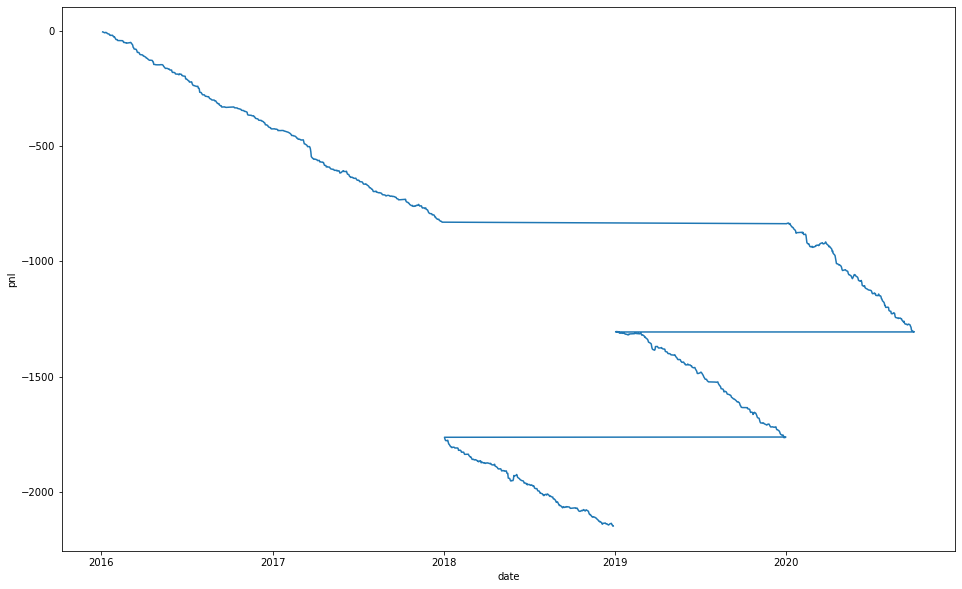

In [102]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-2.325627 	-1.07531 	-0.929965 	0.105699 	84.378676 	-1.891106 	295.119951



- we can see it's really bad
- we can try increasing threshold

In [103]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.01,  noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

CPU times: user 46.7 ms, sys: 35.1 ms, total: 81.8 ms
Wall time: 9.35 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-9.662201,-0.999481,-1.000519,0.192341,19.504787,-0.070437,110.785641


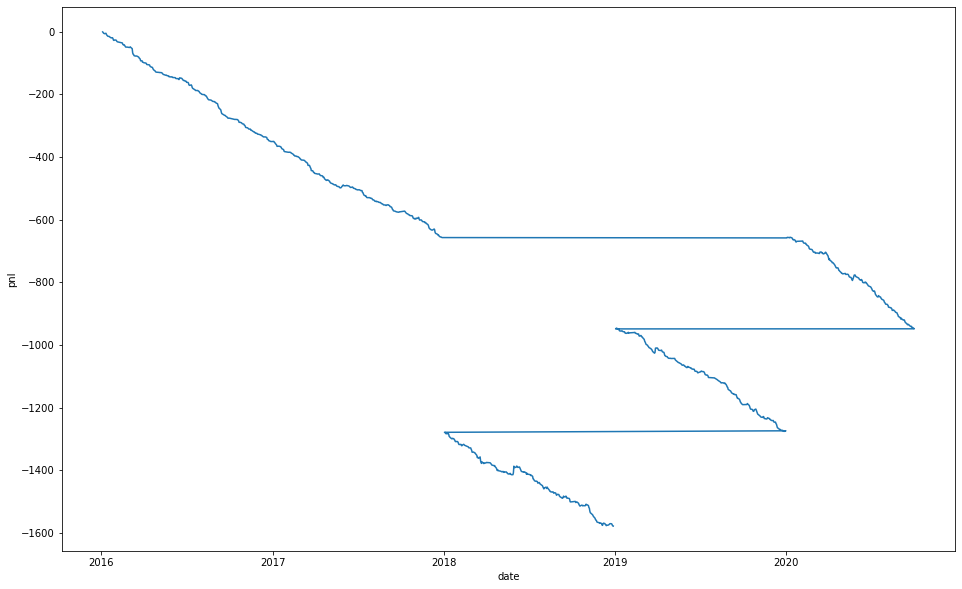

In [104]:
pd.DataFrame(get_performance(result_2), index=[0])

#sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#0 	-10.890261 	-0.99951 	-1.000491 	0.18886 	19.569191 	-0.07432 	110.308517

In [105]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.02, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]

CPU times: user 46.1 ms, sys: 34.3 ms, total: 80.3 ms
Wall time: 8.64 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-5.984634,-1.000992,-0.999009,0.185379,11.166232,-0.065539,93.254793


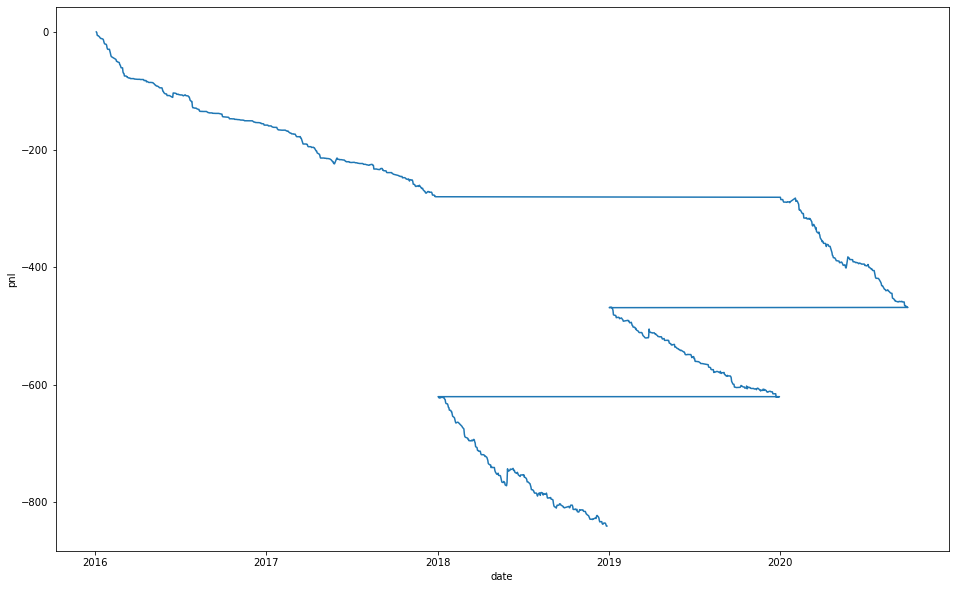

In [106]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

#sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#0 	-7.29792 	-1.000902 	-0.999099 	0.182768 	11.209748 	-0.071771 	92.431599

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [107]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, buy_tranct=1.5e-4, sell_tranct=11.5e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct)
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct)
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [108]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.001, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 45.6 s

CPU times: user 47.4 ms, sys: 35.7 ms, total: 83.1 ms
Wall time: 10 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,4.822824,0.040392,24.757446,0.628372,5.626632,0.090029,699.297757


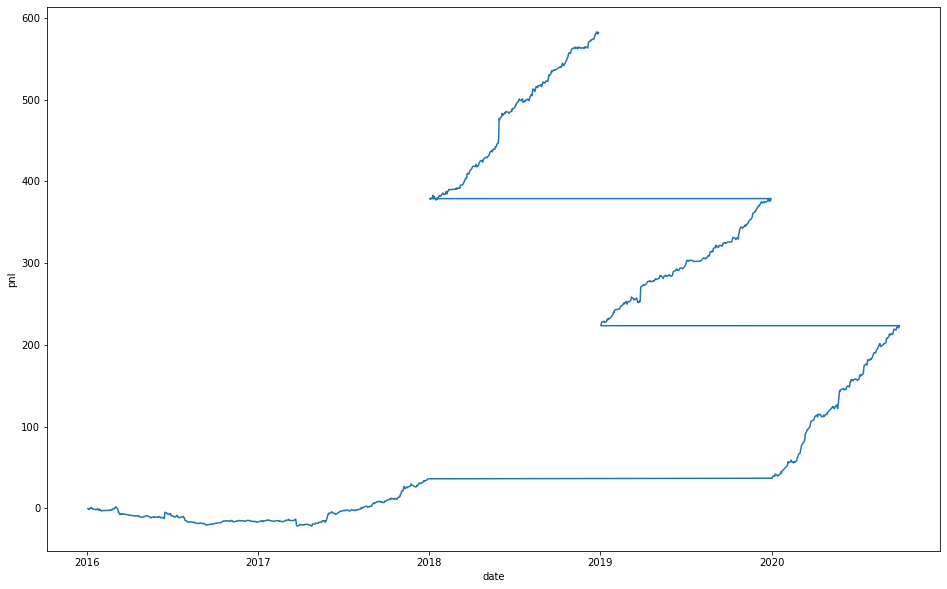

In [109]:
pd.DataFrame(get_performance(result_4,1), index=[0])

#sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#0 	4.006666 	0.089226 	11.207535 	0.626632 	5.635335 	0.073031 	698.217761

- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [110]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.002, noise=0)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 8.95 s

CPU times: user 45 ms, sys: 36.3 ms, total: 81.3 ms
Wall time: 9.94 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,8.174289,0.004833,206.897522,0.744125,3.219321,0.258005,1222.211408


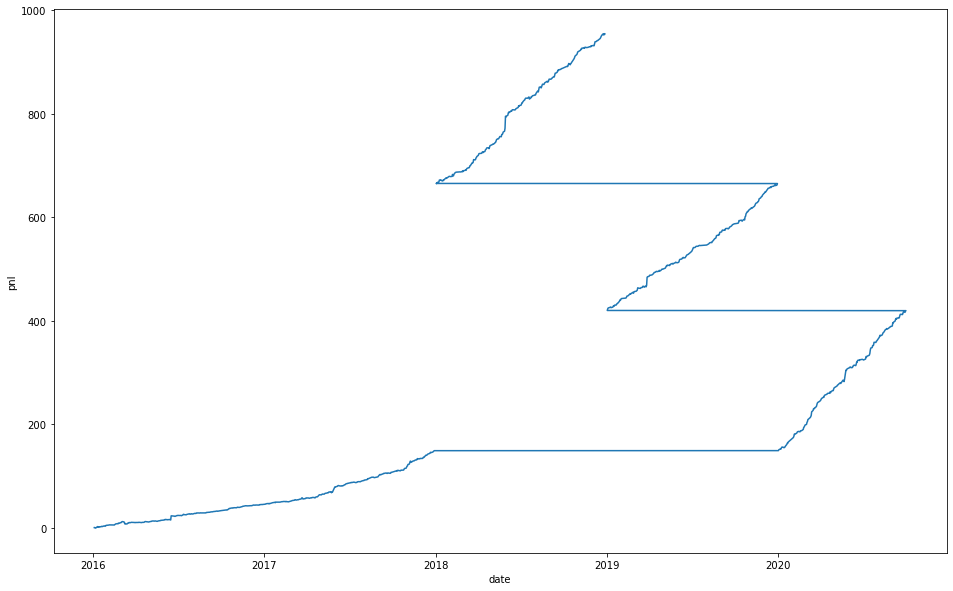

In [111]:
pd.DataFrame(get_performance(result_5,1), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#0 	7.213851 	0.029836 	33.516691 	0.743255 	3.224543 	0.228299 	1220.232119

- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [112]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, buy_tranct=1.5e-4,sell_tranct=11.5e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct)
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct)
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [113]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.001, notional=True)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 9.36 s

CPU times: user 47.6 ms, sys: 34.9 ms, total: 82.5 ms
Wall time: 10.5 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,4.621878,0.066505,15.036388,0.630983,5.626632,0.001167,699.297757


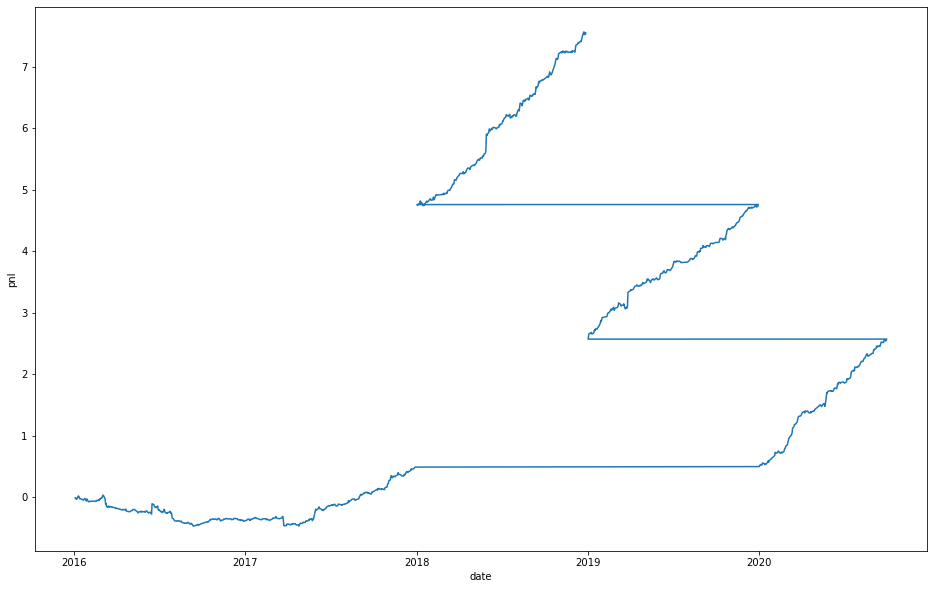

In [114]:
pd.DataFrame(get_performance(result,1), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#0 	3.757665 	0.146235 	6.83832 	0.629243 	5.635335 	0.000933 	698.217761

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products and comapre their results